# Multiple Linear Regression

In this experiment, we apply *multiple linear regression* to the following set of predictors

- AI or ML Job
- Experience Level
- Work Year
- Company Size
- Same Country
- Remote Ratio
- GDP at Employee Residence

and create a plot showing the most significant results. As shown in the *norm_regression.ipynb* esperiment, GDP and Experience level show by far the highest weights. We therfor plot regression lines for GDP at all Experince levels. The plot also contains a scatter of the input as well as the mean salary at each GDP so the reader can get a better intuition of why the regression plot seems steeper than one might assume the lines to be.

This experiment shows the two most prominent predictors of salary plotted over the original data.

In [6]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
import numpy as np
from src.preprocessing import complete_preprocessing
from sklearn.linear_model import LinearRegression
from tueplots import bundles

/var/folders/ct/c6nl4fhx7hx43w75240zn_140000gn/T/ipykernel_32398/3469684118.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


/Users/manuelarns/Developer/Data-Litaracy-Project/exp/src/preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


R2 Score (regression goodness): 0.5233901918678099


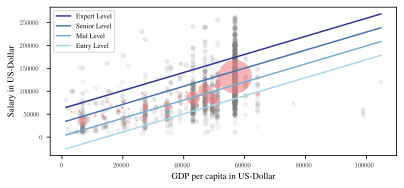

In [38]:
#Plot linear regression of highest correlated attribute

salaries = complete_preprocessing()

#Calculate regression coefficients
X = salaries[["ai_or_ml_job",
              "experience_level",
              "work_year",
              "company_size",
              "same_country",
              "remote_ratio",
              "gdp_employee_residence"]]

mean_salaries = salaries.groupby('gdp_employee_residence') \
                        .agg(mean_salary=('salary_in_usd', 'mean'), count=('gdp_employee_residence', 'size')) \
                        .reset_index() \
                        .to_numpy()

# calc mean of variables that will not be plottet
means = [X.mean().to_numpy()]

# make X and y to numpy
y = salaries["salary_in_usd"]
X = X.to_numpy()
y = y.to_numpy()

# regression and regression goodness
reg = LinearRegression().fit(X, y)
r2_score = reg.score(X.reshape(-1,7), y)
print('R2 Score (regression goodness):', r2_score)

plt.rcParams.update(bundles.neurips2021(family='serif'))
#plt.figure(figsize=(2, 2))
plt.rcParams['figure.figsize'] = (5.5, 2.5)

# predict and plot
sample_size = 2     # as we are plotting a linear function, 2 sample points are enough
predictor_matrix = np.repeat(means, sample_size, axis=0)
predictor_matrix[:,6] = np.linspace(X[:,6].min(), X[:,6].max(), sample_size)

colors = plt.cm.RdYlBu(np.linspace(.7,1,4)) # get nice colors from colormap

for i, experience_level in enumerate(['Expert Level', 'Senior Level', 'Mid Level', 'Entry Level']):
    predictor_matrix[:,1] = np.full(shape=sample_size, fill_value=3-i)
    plt.plot(predictor_matrix[:,6], reg.predict(predictor_matrix), label=experience_level, color=colors[3 - i])

plt.scatter(X[:,6],y, alpha=0.1, s=25, color='gray', linewidth=0)
plt.scatter(mean_salaries[:,0], mean_salaries[:,1], color="lightcoral", alpha=.6, linewidth=0, s=mean_salaries[:,2])# * plt.rcParams['lines.markersize'] ** 2)
plt.legend()
plt.xlabel("GDP per capita in US-Dollar")
plt.ylabel("Salary in US-Dollar")
plt.savefig('../doc/fig/regression.pdf', bbox_inches='tight')
